## Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading CSV File
The 50-50 split of diabetes health indicators dataset were used to train the model.

In [2]:
training_data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
test_data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

## Explaning Columns
1. Diabetes_binary: 
    - 0 = No diabetes
    - 1 = Has prediabetes or diabetes
2. HighBP
    - 0 = Not high
    - 1 = High BP
3. HighChol
    - 0 = No high cholesterol
    - 1 = High cholesterol
4. CholCheck
    - 0 = No cholesterol check in 5 years
    - 1 = Had cholesterol check in 5 years
5. BMI
    - Body Mass Index
6. Smoker
    - Smoked at least 100 cigarettes in your entire life
        - 0 = No
        - 1 = Yes
7. Stroke
    - Had a stroke
        - 0 = No
        - 1 = Yes
8. HeartDiseaseorAttack
    - Had/has a coronary heart disease (CHD) or myocardial infarction (MI)
        - 0 = No
        - 1 = Yes
9. PhysActivity
    - Had physical activity in past 30 days - not including job
        - 0 = No
        - 1 = Yes
10. Fruits 
    - Consume Fruit 1 or more times per day
        - 0 = No
        - 1 = Yes
11. Veggies
    - Consume Vegetables 1 or more times per day
        - 0 = No
        - 1 = Yes
12. HvyAlcoholConsump
    - adult men >= 14 drinks per week
    - adult women >= 7 drinks per week
        - 0 = No
        - 1 = Yes
13. AnyHealthcare
    - Have any kind of health care coverage, including health insurance or prepaid plans
        - 0 = No
        - 1 = Yes
14. NoDocbcCost
    - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
        - 0 = No
        - 1 = Yes
15. GenHlth
    - Would you say that in general your health is: scale 1-5
        - 1 = Excellent
        - 2 = Very good
        - 3 = Good
        - 4 = Fair
        - 5 = Poor
16. MentHlth
    - Days of poor mental health 
        - 1-30 days
17. PhysHlth
    - Physical illness or injury days in past 30 days
        - 1-30 days
18. DiffWalk
    - Do you have serious difficulty walking or climbing stairs
        - 0 = No
        - 1 = Yes
19. Sex
    - 0 = Female
    - 1 = Male
20. Age
    - 13-level age category
        - 1 = 18-24 
        - 9 = 60-64 
        - 13 = 80 or older
21. Education
    - Education level
        - 1 = Never attended school or only kindergarten 
        - 2 = elementary
22. Income
    - Yearly Income 
        - 1 = less than $10,000 
        - 5 = less than $35,000 
        - 8 = $75,000 or more

In [3]:
training_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


## Cleaning of Dataset
Double check if the dataset needs cleaning (i.e. Null Values)

In [4]:
training_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
test_data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Seeing that there are no null values we are free to proceed

In [6]:
# Check if the given dataset is balanced or not
training_data['Diabetes_binary'].value_counts() 

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [7]:
socialecom_group = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
disease_group = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
health_group = ['GenHlth', 'MentHlth', 'PhysHlth']
habit_group = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

## The World Health Organization (WHO) defines the following BMI ranges for adults:

- Underweight: BMI less than 18.5
- Normal weight: BMI between 18.5 and 24.9
- Overweight: BMI between 25 and 29.9
- Obesity: BMI of 30 or greater

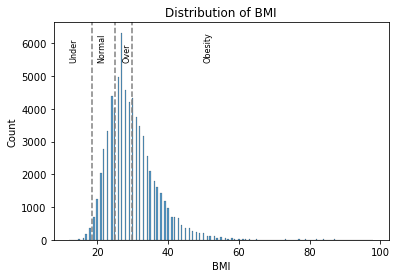

In [8]:
# plot the distribution of BMI  
plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(training_data['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

## Correlation and relationship between each feature and target

In [9]:
# Arrange Columns into groups
cols = ['Diabetes_binary'] + socialecom_group + disease_group + ['BMI'] + health_group + habit_group

training_data[cols].corr() # correlation matrix

,Diabetes_binary,Age,Sex,Education,Income,AnyHealthcare,NoDocbcCost,HighBP,HighChol,CholCheck,...,DiffWalk,BMI,GenHlth,MentHlth,PhysHlth,PhysActivity,Smoker,Fruits,Veggies,HvyAlcoholConsump
Diabetes_binary,1.000000,0.278738,0.044413,-0.170481,-0.224449,0.023191,0.040977,0.381516,0.289213,0.115382,...,0.272646,0.293373,0.407612,0.087029,0.213081,-0.158666,0.085999,-0.054077,-0.079293,-0.094853
Age,0.278738,1.000000,-0.002315,-0.107127,-0.130140,0.136975,-0.129839,0.338132,0.240338,0.101743,...,0.195265,-0.038648,0.155624,-0.101746,0.084852,-0.100753,0.105424,0.061096,-0.018893,-0.057705
Sex,0.044413,-0.002315,1.000000,0.043564,0.159654,-0.006562,-0.048187,0.040819,0.017324,-0.007991,...,-0.082248,0.000827,-0.014555,-0.089204,-0.045957,0.051753,0.112125,-0.088723,-0.052604,0.014164
Education,-0.170481,-0.107127,0.043564,1.000000,0.460565,0.106601,-0.096989,-0.141643,-0.084386,-0.008695,...,-0.202590,-0.100233,-0.285420,-0.107005,-0.159317,0.190271,-0.140966,0.098715,0.152512,0.036279
Income,-0.224449,-0.130140,0.159654,0.460565,1.000000,0.130492,-0.198171,-0.187657,-0.107777,0.007550,...,-0.343245,-0.124878,-0.382969,-0.219070,-0.279326,0.196551,-0.104725,0.079009,0.154899,0.064095
AnyHealthcare,0.023191,0.136975,-0.006562,0.106601,0.130492,1.000000,-0.221658,0.035764,0.031532,0.106800,...,0.008113,-0.013417,-0.033060,-0.049850,-0.003285,0.027089,-0.012939,0.029385,0.029152,-0.013484
NoDocbcCost,0.040977,-0.129839,-0.048187,-0.096989,-0.198171,-0.221658,1.000000,0.026517,0.033199,-0.062669,...,0.127111,0.065832,0.169515,0.193877,0.157451,-0.063302,0.035799,-0.045843,-0.037146,0.009683
HighBP,0.381516,0.338132,0.040819,-0.141643,-0.187657,0.035764,0.026517,1.000000,0.316515,0.103283,...,0.234784,0.241019,0.320540,0.064294,0.173922,-0.136102,0.087438,-0.040852,-0.066624,-0.027030
HighChol,0.289213,0.240338,0.017324,-0.084386,-0.107777,0.031532,0.033199,0.316515,1.000000,0.085981,...,0.162043,0.131309,0.237778,0.083881,0.142610,-0.090453,0.093398,-0.047384,-0.042836,-0.025443
CholCheck,0.115382,0.101743,-0.007991,-0.008695,0.007550,0.106800,-0.062669,0.103283,0.085981,1.000000,...,0.044430,0.045648,0.059213,-0.010660,0.034540,-0.008249,-0.004331,0.017384,0.000349,-0.027146


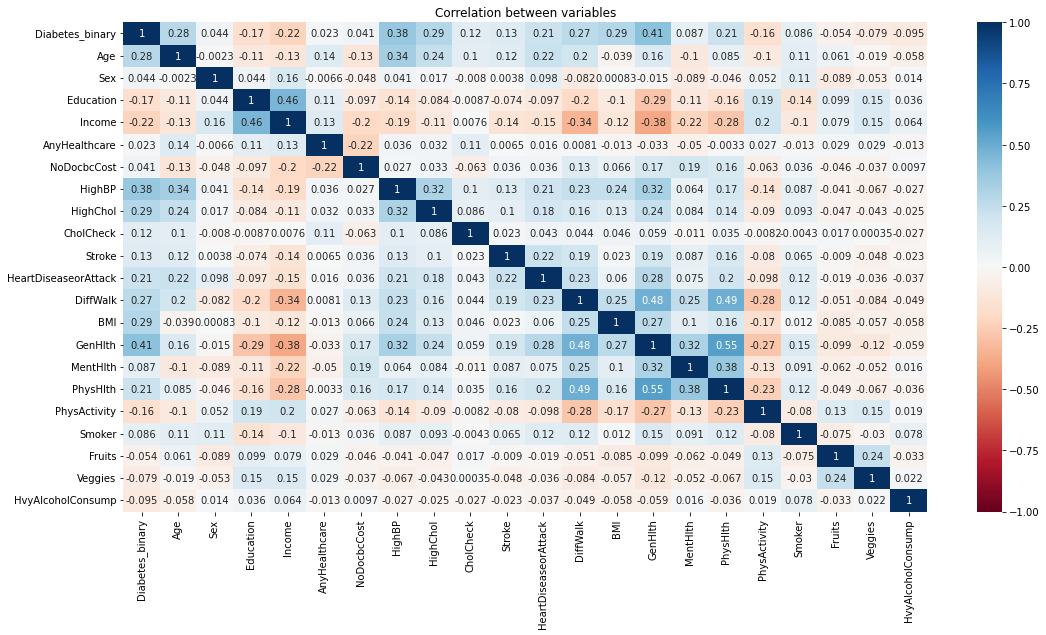

In [10]:
plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(training_data[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

In [11]:
training_data.corr()['Diabetes_binary'].abs().sort_values(ascending=False).head(15)

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
Income                  0.224449
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Education               0.170481
PhysActivity            0.158666
Stroke                  0.125427
CholCheck               0.115382
HvyAlcoholConsump       0.094853
Name: Diabetes_binary, dtype: float64

As seen above, factors, such as GenHlth, HighBP, BMI, and HighChol, has a positive correlation with diabetes

## Logistic Regression
By taking the top 8 factors that correlate with diabetes, we will now create a logistic regression learning model.

In [12]:
x = training_data[['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'Income', 'PhysHlth']]
y = training_data['Diabetes_binary']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1, random_state=42)

x_test = test_data[['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'Income', 'PhysHlth']]
y_test = test_data['Diabetes_binary']

In [13]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=200)
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [23]:
LogReg.score(x_test, y_test)

0.7255163986124251

In [24]:
y_pred = LogReg.predict(x_test)

In [25]:
print('Clasification Report:')
print(classification_report(y_test, y_pred))

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82    218334
         1.0       0.31      0.76      0.44     35346

    accuracy                           0.73    253680
   macro avg       0.63      0.74      0.63    253680
weighted avg       0.86      0.73      0.77    253680



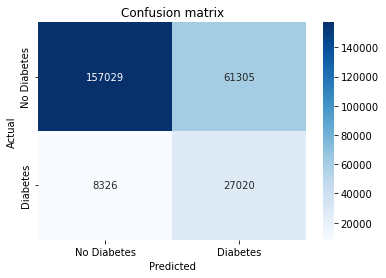

In [26]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()

## K Neighbors Classifier

In [29]:
KNC = KNeighborsClassifier(n_neighbors=5)
KNC.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
KNC.score(x_test, y_test)

0.7162842951750237

In [31]:
y_pred = KNC.predict(x_test)

In [32]:
print('Clasification Report:')
print(classification_report(y_test, y_pred))

Clasification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81    218334
         1.0       0.30      0.81      0.44     35346

    accuracy                           0.72    253680
   macro avg       0.63      0.75      0.63    253680
weighted avg       0.87      0.72      0.76    253680



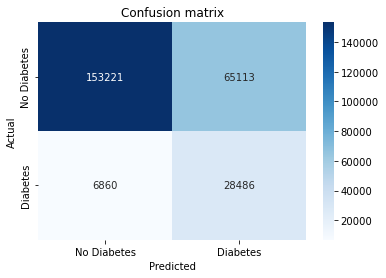

In [33]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()